In [1]:
import matplotlib.pyplot as plt
from generate_plots import convert_tb_data

In [68]:
def generate_plot(df, col_name, title=None, filter_outliers=False):
    df_filtered = df[df.name == col_name].reset_index(drop=True)
    # Filter outliers:
    if filter_outliers:
        df_filtered = df_filtered[df_filtered.value <= df_filtered.iloc[:10].max().value * 2]
    fig, ax = plt.subplots(1,1)
    df_filtered[['value']].plot(ax=ax)
    ax.set_title(title)
    ax.set(xlabel="Episodes")
    ax.legend().remove()
    ax.set_ylim([0, 0.3 * 1e9])
    ax.grid()
    fig.set_size_inches(7, 3.5)
    return fig

In [80]:
FILE_PATH = r"../models/experiment_runs/run2/logs"

In [81]:
df = convert_tb_data(FILE_PATH)

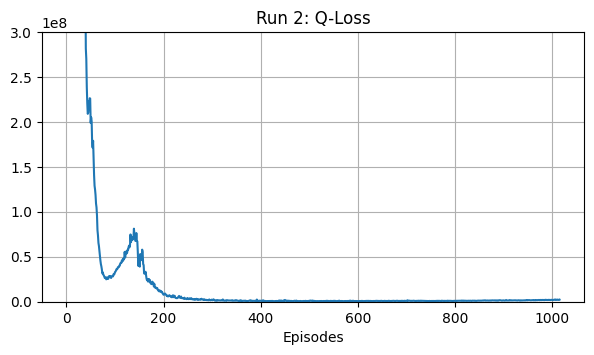

In [82]:
fig = generate_plot(df, "losses/q_loss", title="Run 2: Q-Loss", filter_outliers=True)

In [83]:
fig.savefig("./plots/run_2_q_loss")